## Анализ данных пассажиров Титаника


In [109]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [110]:
my_data = pd.read_csv("train.csv")

In [111]:
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
my_data.shape

(891, 12)

In [113]:
my_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
my_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [115]:
my_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
my_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [116]:
# количество выживыших 
surv = my_data.Survived.sum()


In [117]:
all_passengers = my_data.PassengerId.count()
#процент выживших
pers_all_pass = (surv/all_passengers)*100 # следовательно, выжило меньше половины пассижиров
print('Всего пассажиров:', all_passengers)
print('Количество выживших пассажиров:', surv)
print('Процент выживших пассажиров:',pers_all_pass,'%')


Всего пассажиров: 891
Количество выживших пассажиров: 342
Процент выживших пассажиров: 38.38383838383838 %


In [119]:
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
men = (my_data.Sex == 'male').sum() #столько было мужчин
women = (my_data.Sex == 'female').sum() #cколько было женщин
print('Количество мужчин:', men)
print('Количество женщин:', women)

Количество мужчин: 577
Количество женщин: 314


<AxesSubplot:>

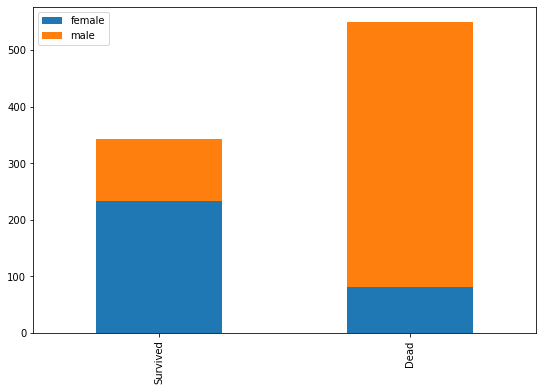

In [121]:
# Посмотрим на соотношение выживших среди мужчин и женщин
survived_sex = my_data[my_data['Survived']==1]['Sex'].value_counts()
dead_sex = my_data[my_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(9,6))

### Очевидно, что среди выживших было больше женщин, что и показывает график выше. 

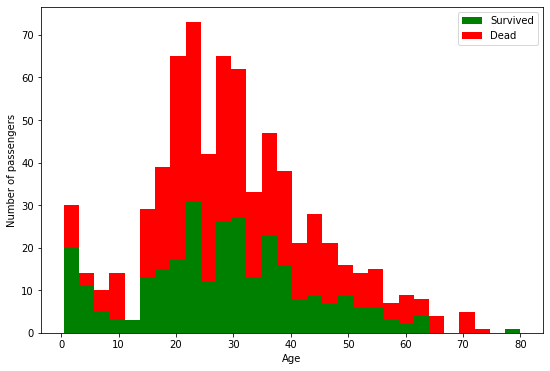

In [122]:
# Рассмотрим взаимосвязь с возрастом
figure = plt.figure(figsize=(9,6))
plt.hist([my_data[my_data['Survived']==1]['Age'],my_data[my_data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

### Можно сделать вывод, что возраст не особо влиял на выживаемость. Низкий показатель выживших пассажиров в возрасте (справа) указывает на то, что, скорее всего, это был пассажир первого класса (может, женщина?).

In [127]:
my_data[(my_data['Pclass'] == 1) & (my_data['Age'] >= 75)].head()
# Как оказалось, выживший оказался мужчиной первого класса.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


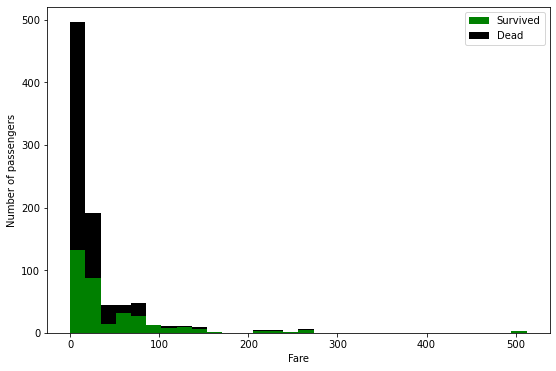

In [80]:
# Связь с транспортным расходом
figure = plt.figure(figsize=(9,6))
plt.hist([my_data[my_data['Survived']==1]['Fare'],my_data[my_data['Survived']==0]['Fare']], stacked=True, color = ['g','black'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

### С одной стороны, чем выше транспортный расход, тем меньше погибших. Однако с другой стороны, нельзя сказать, что выживших тоже много. Возможно это можно объяснить тем, что пассажиров первого класса в целом было меньше, чем остальных пассажиров. 

In [85]:
# Посмотрим, сколько пассажиров в каждом из классов
my_data.Pclass.astype('str').value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

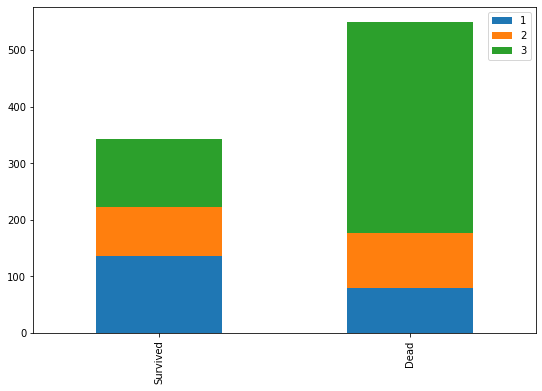

In [86]:
survived_class = my_data[my_data['Survived']==1]['Pclass'].value_counts()
dead_class = my_data[my_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived_class,dead_class])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(9,6))

### Понятно, что пассажиров третьего класса умерло больше, чем выжило. Обратная ситуация наблюдается у пассажиров первого класса. Второй класс где-то между. 

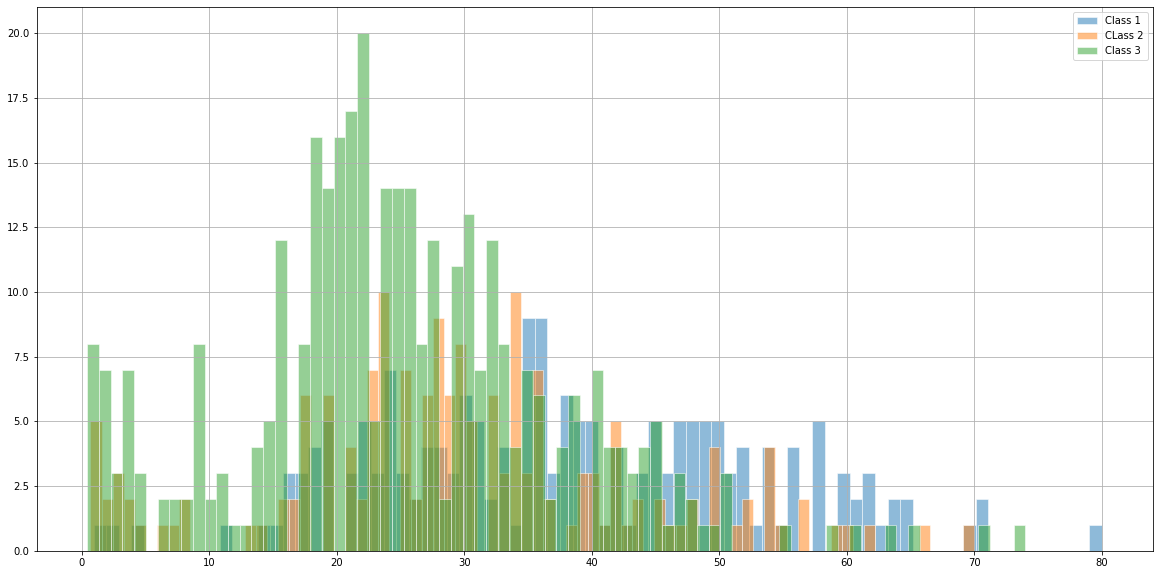

In [133]:
# Красивый график с семинара
ax =my_data[my_data.Pclass == 1]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
my_data[my_data.Pclass == 2]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
my_data[my_data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class 1', 'CLass 2', 'Class 3'])

<AxesSubplot:>

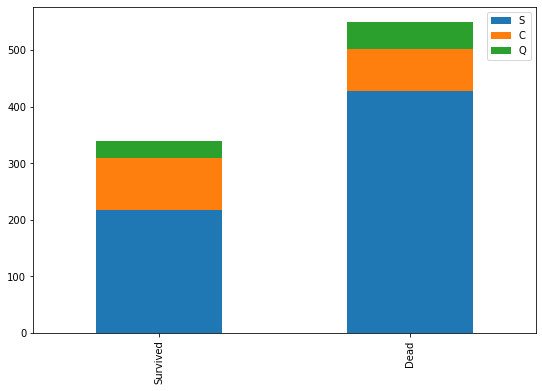

In [134]:
survived_embark = my_data[my_data['Survived']==1]['Embarked'].value_counts()
dead_embark = my_data[my_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(9,6))

### Исходя из вышеуказанной диаграммы и здравого смысла, можно сказать, что порт отправления никак не влиял на выживаемость пассажиров. 